In [77]:
from Bio import AlignIO
import matplotlib.pyplot as plt

from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

import rich
from rich_msa import RichAlignment

import logomaker
import pandas as pd

#Import modules
import gzip, logomaker, matplotlib.pyplot as plt, numpy as np, os, pandas as pd, protfasta

import glob 
import pickle

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [22]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Notebook adapted from version shared by CL on 12/2/24

# Generate alignment

In [23]:
#Dna transcripts for ref seq
human_dna_transcripts = pickle.load(open('../soto_analysis/raw_files/dna_transcripts.dat', 'rb'))

In [47]:
files = glob.glob("../data/zoonomia_toga_mca/ENST*")

# Converting codon alignment to unaligned protein sequences
for file in files:
    #Uncompress - run once
    #os.system("gunzip " + file)

    # Read in as dataframe
    
    df = protfasta.read_fasta(file, invalid_sequence_action = 'convert') #Convert - to ""
    df = pd.DataFrame({"id" : df.keys(), "nt_seq" : df.values()})
    df["prot_seq"] = [str(Seq(_).translate())[:-1] for _ in df["nt_seq"]]


    ENST = file.split("/")[-1].split(".")[0]
    gene =  file.split("/")[-1].split(".")[1]

    prot_dict = dict(zip(df["id"], df["prot_seq"]))
    protfasta.write_fasta(prot_dict, "../data/zoonomia_toga_mca/prot_fastas/" + gene)
    # if ENST in human_dna_transcripts.keys():
        
    #     prot_dict = {"human": str(Seq(human_dna_transcripts[ENST]).translate()), **prot_dict}

        
    # else:
    #     print("ERROR")
    #     print(ENST)

In [48]:
# Making directory to save alignments
# ! mkdir ../data/zoonomia_toga_mca/prot_alignments

In [49]:
gene = "CASZ1"
os.system("mafft --auto --quiet ../data/zoonomia_toga_mca/prot_fastas/" + gene + " > ../data/zoonomia_toga_mca/prot_alignments/" + gene + ".fasta")

0

In [51]:
genes = glob.glob("../data/zoonomia_toga_mca/ENST*")
genes = [_.split(".")[-2] for _ in genes]
genes

['CASZ1',
 'ARNT2',
 'YY1',
 'IKZF1',
 'NR1D1',
 'MSX2',
 'ESR2',
 'KLF7',
 'NFE2L3',
 'PITX1',
 'PAX5',
 'MEIS2',
 'ARX',
 'EGR3',
 'NKX2-2',
 'SRCAP',
 'MTF1',
 'CAMTA2',
 'TFE3',
 'TCF7L2',
 'KLF16',
 'CC2D1A',
 'AR']

In [ ]:
for gene in genes:
    # Run mafft to align
    os.system("mafft --auto --quiet ../data/zoonomia_toga_mca/prot_fastas/" + gene + " > ../data/zoonomia_toga_mca/prot_alignments/" + gene + ".fasta")

    #

In [129]:
# Keep AD region only

# Full TF alignment
prot_alignment = protfasta.read_fasta("../data/zoonomia_toga_mca/prot_alignments/CASZ1.fasta", invalid_sequence_action = "ignore")
prot_alignment = pd.DataFrame({"species" : prot_alignment.keys(), "seq" : prot_alignment.values()})
prot_alignment

species  \
0                                   REFERENCE   
1       vs_HLaciJub2\tENST00000377022.CASZ1.2   
2         vs_vicPac2\tENST00000377022.CASZ1.3   
3        vs_ursMar1\tENST00000377022.CASZ1.12   
4         vs_tupChi1\tENST00000377022.CASZ1.1   
..                                        ...   
466  vs_HLnanGra1\tENST00000377022.CASZ1.1385   
467    vs_HLokaJoh2\tENST00000377022.CASZ1.54   
468   vs_HLequAsi1\tENST00000377022.CASZ1.223   
469     vs_HLarcGaz2\tENST00000377022.CASZ1.3   
470      vs_octDeg1\tENST00000377022.CASZ1.92   

                                                   seq  
0    MDLGTAEGTRCTDPPAGKPAM-APKRKGGLKLNAICAKLSRQVVVE...  
1    MDLGTAEGTRCTDPPAGKPAM-AAKRKGGLKLNAICAKLSRQVVVE...  
2    MDLGTAEGTRCTDPPTGKPAM-AAKRKGGLKLNAICAKLSRQVVVE...  
3    MDLGT-----------------------------------------...  
4    MDLGTAEGTRCSDPPAGKPAM-AAKRKGGLKLNAICAKLSRQVVVE...  
..                                                 ...  
466  ---------------------------GGLLKN-------------...  
467  ------EGTRCTDPPAGKPAM-AAKRKGGLKLNAICAKLSRQVVVE...  
468  ------EGSRCTDPPAGKPSM-AAKRKGGLKLNAICAKLSRQVVVE...  
469  ------EGTRCTDPPADKPAM-AAKRKGGLKLNAQAAG-----VVE...  
470  ------EGTRCTDPPAGKTAM-AAKRKGGLKLNAICAKLSRQVVVE...  

[471 rows x 2 columns]

In [177]:
# Splitting each alignment up so one character per column

prot_align_split = prot_alignment['seq'].str.split('', expand=True)
prot_align_split = prot_align_split.drop(columns = [0])
prot_align_split = pd.concat([prot_alignment[["species"]], prot_align_split], axis=1)
prot_align_split

species  1  2  3  4  5  6  7  8  9  ...  \
0                                   REFERENCE  M  D  L  G  T  A  E  G  T  ...   
1       vs_HLaciJub2\tENST00000377022.CASZ1.2  M  D  L  G  T  A  E  G  T  ...   
2         vs_vicPac2\tENST00000377022.CASZ1.3  M  D  L  G  T  A  E  G  T  ...   
3        vs_ursMar1\tENST00000377022.CASZ1.12  M  D  L  G  T  -  -  -  -  ...   
4         vs_tupChi1\tENST00000377022.CASZ1.1  M  D  L  G  T  A  E  G  T  ...   
..                                        ... .. .. .. .. .. .. .. .. ..  ...   
466  vs_HLnanGra1\tENST00000377022.CASZ1.1385  -  -  -  -  -  -  -  -  -  ...   
467    vs_HLokaJoh2\tENST00000377022.CASZ1.54  -  -  -  -  -  -  E  G  T  ...   
468   vs_HLequAsi1\tENST00000377022.CASZ1.223  -  -  -  -  -  -  E  G  S  ...   
469     vs_HLarcGaz2\tENST00000377022.CASZ1.3  -  -  -  -  -  -  E  G  T  ...   
470      vs_octDeg1\tENST00000377022.CASZ1.92  -  -  -  -  -  -  E  G  T  ...   

    2480 2481 2482 2483 2484 2485 2486 2487 2488 2489  
0      S    P    -    -    -    -    -    -    -       
1      P    -    -    -    -    -    -    -    -       
2      -    -    -    -    -    -    -    -    -       
3      -    -    -    -    -    -    -    -    -       
4      -    -    -    -    -    -    -    -    -       
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
466    -    -    -    -    -    -    -    -    -       
467    P    -    -    -    -    -    -    -    -       
468    -    -    -    -    -    -    -    -    -       
469    P    -    -    -    -    -    -    -    -       
470    -    -    -    -    -    -    -    -    -       

[471 rows x 2490 columns]

In [175]:
# Figuring out which columns to keep 

# Working with reference human sequence, getting positions of AAs 
ref_alignment = pd.DataFrame({"alignment_AA" : list(prot_alignment["seq"].iloc[0])})

pos = []
count = 1

for i in ref_alignment.index:
    if ref_alignment["alignment_AA"].iloc[i] != "-":
        pos.append(count)
        count += 1
    else:
        pos.append(np.nan)

ref_alignment["full_prot_pos"] = pos
ref_alignment

alignment_AA  full_prot_pos
0               M            1.0
1               D            2.0
2               L            3.0
3               G            4.0
4               T            5.0
...           ...            ...
2483            -            NaN
2484            -            NaN
2485            -            NaN
2486            -            NaN
2487            -            NaN

[2488 rows x 2 columns]

In [207]:
# Using known ADs to get starts and ends of ADs in that TF

known_ADs = pd.read_csv("../output/known_ADs_considering_isoforms_and_canonical.csv")
TF_ADs = known_ADs[known_ADs["Gene"] == gene]

for start, end, expec_str in zip(TF_ADs["Start"], TF_ADs["End"], TF_ADs["ProteinRegionSeq"]):
    alignment_str =  "".join(list(ref_alignment.dropna().iloc[start-1:end]["alignment_AA"]))
    if expec_str != alignment_str:
        print("Check ") + gene
    else:
        print(gene + " all good")

        # Keep these positions of the MSA
        pos_to_keep = ref_alignment.dropna().iloc[start : end + 1].index
        pos_to_keep

CASZ1 all good


In [208]:
expec_str

'LNAICAKLSRQVVVEKRADAGSHTEGSPSQPRDQERSGPESGAARAPRSEEDKRRAVIEKWVNGEYSEEPAPTPVLGRIAREGLELPPEGVYMVQPQGCSDEEDHAEEPSKDGGALEEKDSDGAASKEDSGPSTRQASGEASSLRDYAASTMTEF'

In [210]:
AD_alignment_df = pd.concat([prot_align_split[["species"]], prot_align_split.loc[:, pos_to_keep]], axis = 1)
AD_alignment_df

species 32 33 34 35 36 37 38 39 40  ...  \
0                                   REFERENCE  L  N  A  I  C  A  K  L  S  ...   
1       vs_HLaciJub2\tENST00000377022.CASZ1.2  L  N  A  I  C  A  K  L  S  ...   
2         vs_vicPac2\tENST00000377022.CASZ1.3  L  N  A  I  C  A  K  L  S  ...   
3        vs_ursMar1\tENST00000377022.CASZ1.12  -  -  -  -  -  -  -  -  -  ...   
4         vs_tupChi1\tENST00000377022.CASZ1.1  L  N  A  I  C  A  K  L  S  ...   
..                                        ... .. .. .. .. .. .. .. .. ..  ...   
466  vs_HLnanGra1\tENST00000377022.CASZ1.1385  K  N  -  -  -  -  -  -  -  ...   
467    vs_HLokaJoh2\tENST00000377022.CASZ1.54  L  N  A  I  C  A  K  L  S  ...   
468   vs_HLequAsi1\tENST00000377022.CASZ1.223  L  N  A  I  C  A  K  L  S  ...   
469     vs_HLarcGaz2\tENST00000377022.CASZ1.3  L  N  A  Q  A  A  G  -  -  ...   
470      vs_octDeg1\tENST00000377022.CASZ1.92  L  N  A  I  C  A  K  L  S  ...   

    210 211 212 213 214 215 216 217 218 219  
0     D   Y   A   A   S   T   M   T   E   F  
1     D   Y   A   A   S   T   M   T   E   F  
2     -   -   -   -   -   -   -   -   -   -  
3     D   Y   A   A   S   T   M   T   E   F  
4     D   Y   A   A   S   T   M   T   E   F  
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
466   -   -   -   -   -   -   -   -   -   -  
467   D   Y   A   A   S   T   M   T   E   F  
468   D   Y   A   A   S   T   M   T   E   F  
469   D   Y   A   A   S   T   M   T   E   F  
470   D   Y   A   A   S   T   M   T   E   F  

[471 rows x 156 columns]

In [215]:
AD_alignment_for_fasta = AD_alignment_df[["species"]]
AD_alignment_for_fasta['prot_seq'] = AD_alignment_df.iloc[:, 1:].apply(lambda x: ''.join(x), axis=1)
AD_alignment_for_fasta

species  \
0                                   REFERENCE   
1       vs_HLaciJub2\tENST00000377022.CASZ1.2   
2         vs_vicPac2\tENST00000377022.CASZ1.3   
3        vs_ursMar1\tENST00000377022.CASZ1.12   
4         vs_tupChi1\tENST00000377022.CASZ1.1   
..                                        ...   
466  vs_HLnanGra1\tENST00000377022.CASZ1.1385   
467    vs_HLokaJoh2\tENST00000377022.CASZ1.54   
468   vs_HLequAsi1\tENST00000377022.CASZ1.223   
469     vs_HLarcGaz2\tENST00000377022.CASZ1.3   
470      vs_octDeg1\tENST00000377022.CASZ1.92   

                                              prot_seq  
0    LNAICAKLSRQVVVEKRAD-GSHTEGSPS--RDQE--GPESGAARA...  
1    LNAICAKLSRQVVVEKGAE-GPQPEGSPL--RDRE------GVARG...  
2    LNAICAKLSRQVVVEKGAE-GSQAEGSPL--RDKE--GPEPGVARA...  
3    ----------------------------------------------...  
4    LNAICAKLSRQVVVEKGAE-GPHTEGSSL--QDKE--GPESGVARA...  
..                                                 ...  
466  KN--------------------------------------------...  
467  LNAICAKLSRQVVVEKGGE-SARAEGSPL--RDKE--GPESGVART...  
468  LNAICAKLSRQVVVEKGAE-GPHTEGSPL--RDKE--GPELGGTRA...  
469  LNAQAAG-----VVE-XAE-GPKAEGSPL--RNRE------GMARG...  
470  LNAICAKLSRQVVVEKGAE-GSQAEGSPP--RDKE--GPEPGIART...  

[471 rows x 2 columns]

In [216]:
! mkdir ../data/zoonomia_toga_mca/AD_alignments

In [219]:
protfasta.write_fasta(dict(zip(AD_alignment_for_fasta["species"], AD_alignment_for_fasta["prot_seq"])),
                      "../data/zoonomia_toga_mca/AD_alignments/" + gene + ".fasta")

In [225]:
# Filter the alignment to remove gaps (remove positions that are more than 90% gaps)
# This is for the top 69 most active sequences

alignment = AlignIO.read("../data/zoonomia_toga_mca/AD_alignments/CASZ1.fasta", "fasta")
gap_threshold = 1 # No threshold

columns_to_keep = []
num_sequences = len(alignment)

# Get columns with less than 90% gaps
for col_idx in range(alignment.get_alignment_length()):
    column = alignment[:, col_idx]
    num_gaps = column.count('-')
    gap_fraction = num_gaps / num_sequences

    if gap_fraction < gap_threshold:
        columns_to_keep.append(col_idx)

# Write filtered alignment to list
filtered_records = []
for record in alignment:
    filtered_seq = ''.join(record.seq[i] for i in columns_to_keep)
    filtered_records.append(SeqRecord(Seq(filtered_seq), id=record.id, description=record.description))

# Turn list into Biopython alignment object
filtered_alignment_69 = MultipleSeqAlignment(filtered_records)

# # Save the filtered alignment
# AlignIO.write(filtered_alignment_69, "../data/zoonomia_toga_mca/prot_alignments/CASZ1_filtered.fasta", "fasta")


In [9]:
# # Filter the alignment to remove gaps (remove positions that are more than 90% gaps)
# # This is for the top 138 most active sequences
# alignment = AlignIO.read("AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft.fasta", "fasta")

# gap_threshold = 0.9

# # Get columns with less than 90% gaps
# columns_to_keep = []
# num_sequences = len(alignment)

# for col_idx in range(alignment.get_alignment_length()):
#     column = alignment[:, col_idx]
#     num_gaps = column.count('-')
#     gap_fraction = num_gaps / num_sequences

#     if gap_fraction < gap_threshold:
#         columns_to_keep.append(col_idx)

# # Write filtered alignment to list
# filtered_records = []
# for record in alignment:
#     filtered_seq = ''.join(record.seq[i] for i in columns_to_keep)
#     filtered_records.append(SeqRecord(Seq(filtered_seq), id=record.id, description=record.description))

# # Turn list into Biopython alignment object
# filtered_alignment_138 = MultipleSeqAlignment(filtered_records)

# # Save the filtered alignment
# AlignIO.write(filtered_alignment_138, "AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft_filtered.fasta", "fasta")


In [37]:
# Amino acid colors, where gaps are colored black (used in actual alignment)
# Colors used for the alignment barplots and the sequence motifs
amino_acid_colors_black = {
    # Purples
    'F': '#ECA758',  
    'W': '#306BAC',
    'L': '#562F7F',

    # Reds
    'D': '#D04741', 
    'E': '#EAA3A7', 

    # Blues
    'K': '#52B0E1', 
    'R': '#52B0E1', 

    # black
    'S': '#000000', 
    'P': '#000000',

    # greys
    'A': '#787878',
    'V': '#787878',
    'I': '#787878',
    'M': '#787878',
    'T': '#787878',
    'G': '#787878',
    'C': '#787878',
    'N': '#787878',
    'Q': '#787878',
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#000000"
}

# Make pretty alignment visualization

In [226]:
viewer = RichAlignment(
    names=["" for record in filtered_alignment_69],
    sequences=[str(record.seq) for record in filtered_alignment_69], 
    styles=amino_acid_colors_black
)

In [249]:
# Use a console to display alignment on one line
console = rich.console.Console(force_terminal=True, width=alignment_len, record=True)
align = rich.align.Align(viewer, width=alignment_len)
console.print(align)

# Save the stuff printed to the console as html format
html_txt = console.export_html()

# Write html to file
with open("alignment_69_filtered_new_colors.html", "w+") as f:
    f.write(html_txt)

  1  LNAICAKLSRQVVVEKRAD-GSHTEGSPS--RDQE--GPESGAARAPRSEEDKRRAVIEKWVNGEYSEEPAPTPVLGRIAREGLELPPEGVYMVQPQGCSDEED-AEEPSK-G--LEEK-S-GAAS-EDSGPSTRQA-GEASSLRD 
     1  LNAICAKLSRQVVVEKGAE-GPQPEGSPL--RDRE------GVARGVRSEEDKRRAVIEKWVNGEYSEEPAPAPSLGRIGREGLELPPEGVYMVQPQGCSDEED-GEEPPR-GG-TEEK-S-GAAS-DDSGPSTKQA-GEASSLRD 
     1  LNAICAKLSRQVVVEKGAE-GSQAEGSPL--RDKE--GPEPGVARAPRSEEDKRRAVIEKWVNGEYSEEPAPTPVLGRIAREGLELPPEGVYMVQPQGCSDEED-GEEPSK-G--MEEK-S-GAAS-DDSGPSAKQA--------- 
     1  -------------------------------------------------------------------------------------------------------------------------------------------EASSLRD 
     1  LNAICAKLSRQVVVEKGAE-GPHTEGSSL--QDKE--GPESGVARAPRSEEDKRRAVIEKWVNGEYSEEPAPTPVLGRIARESLELPPEGVYMVQPQGCSDEED-AQEPCK-G--LEEK-S-GAAS-EDSGPSAKQA-GEASSLRD 
     1  LNAICAKLSRQVVVE[38;2

# Make alignment conservation plot

In [1]:
# Colors used for the alignment barplots and the sequence motifs
amino_acid_colors_white = {
    # Purples
    'F': '#ECA758',  
    'W': '#306BAC',
    'L': '#562F7F',

    # Reds
    'D': '#D04741', 
    'E': '#EAA3A7', 

    # Blues
    'K': '#52B0E1', 
    'R': '#52B0E1', 

    # black
    'S': '#000000', 
    'P': '#000000',

    # greys
    'A': '#787878',
    'V': '#787878',
    'I': '#787878',
    'M': '#787878',
    'T': '#787878',
    'G': '#787878',
    'C': '#787878',
    'N': '#787878',
    'Q': '#787878',
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#FFFFFF", 
    "X": "#FFFFFF"
}

def make_alignment_conservation_plot(alignment_file, output_file, remove_gaps=False):
    """
    Function to make alignment conservation plots.
    
    alignment_file: Input alignment file
    output_file: Where to save the image
    remove_gaps: Whether or not to remove positions that are over 90% gaps 
    """
    with open(alignment_file, "r") as f:
        lines = f.readlines()

    names = []
    seqs = []
    seq = ""

    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">",""))
            if len(seq) > 0:
                seqs.append(seq)
                seq = ""
        else:
            seq += line.strip()

    seqs.append(seq)

    amino_acids = ['C', 'N', 'Q', 'T', 'G', 'A', 'V', 'I', 'M','Y','H', 'S', 'P', 'D', 'E', 'K', 'R', 'F', 'W', 'L', '-', "X"]

    # Each sequence position gets an dictionary is the list
    amino_acid_dicts = [{aa: 0 for aa in amino_acids}.copy() for _ in range(len(seqs[0]))]

    for seq in seqs: 
        for i, aa in enumerate(seq): 
            amino_acid_dicts[i][aa] += 1
    
    if remove_gaps: 
        filtered_aa_dict = []
        for aa_d in amino_acid_dicts:
            if aa_d['-'] < len(seqs) * .90:
                filtered_aa_dict.append(aa_d)
        amino_acid_dicts = filtered_aa_dict

    from matplotlib.lines import Line2D

    sns.set_context('talk')
    
    fig, ax = plt.subplots(figsize=(15, 3))

    for i, count_dict in enumerate(amino_acid_dicts): 
        bottom = 0
        for aa, count in count_dict.items():
            p = ax.bar(i, count/len(seqs), label=aa, bottom=bottom, color = amino_acid_colors_white[aa])
            bottom += count/len(seqs)

    ax.set_xlabel("Alignment position")
    ax.set_ylabel("Percent of sequences")
    
    sns.despine()
    
    custom_lines = []

    for color in list(amino_acid_colors_white.values()):
        custom_lines.append(Line2D([0], [0], color=color, lw=2))

    ax.legend(custom_lines, list(amino_acid_colors_white.keys()), bbox_to_anchor=(1.05, 0.95), fontsize=10)

    ax.set_xlim(0 - 0.5, len(amino_acid_dicts) + 0.5)
                
    plt.tight_layout()
    plt.savefig(output_file)

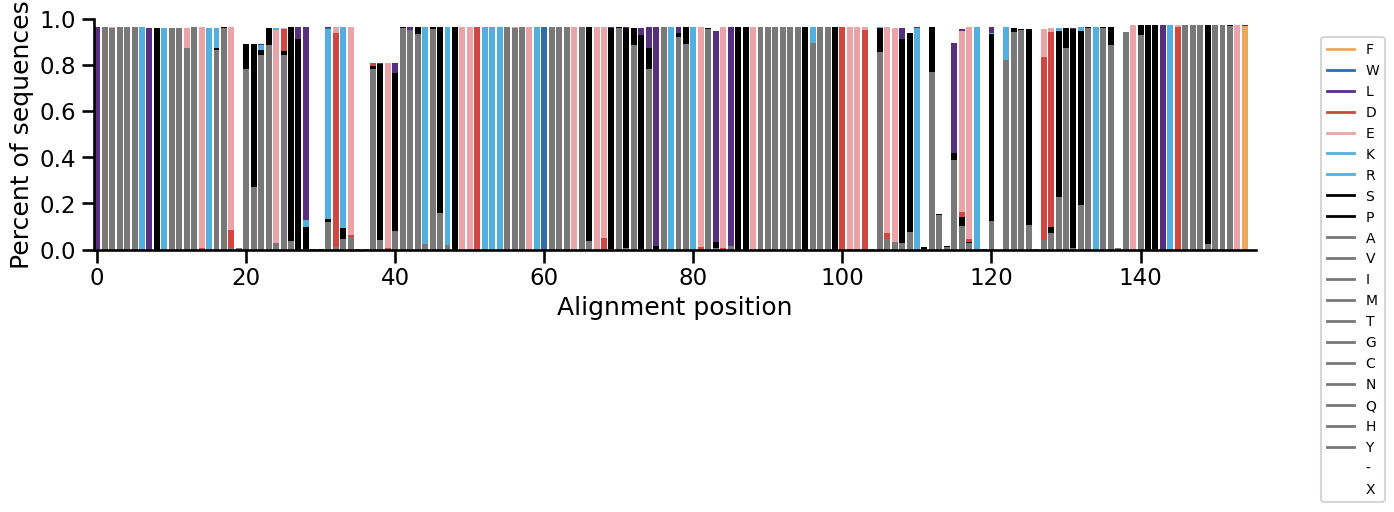

In [242]:
make_alignment_conservation_plot("../data/zoonomia_toga_mca/AD_alignments/CASZ1.fasta", "../data/zoonomia_toga_mca/AD_alignments/CASZ1.pdf")

# Make Logo

In [229]:
# Create a function that takes in a fasta file containing a multiple sequence alignment (MSA),
# a coloring scheme for each amino acid, the start and stop positions in the amino acid MSA (for the
# range that the LogoMaker covers), the x-axis tick spacing, and the width and height values for logo
def DrawLogo(alignment_file, AA_color_scheme, start_position, end_position, x_axis_tick_space, figure_width = 16, figure_height = 4, ax = None):

    # Read in fasta file
    fasta_file = protfasta.read_fasta(alignment_file, invalid_sequence_action = 'ignore', alignment = True, expect_unique_header = False)

    # Convert the alignment into a dataframe
    fasta_file = pd.DataFrame(fasta_file.items(), columns = ['Name', 'Sequence'])

    # Extract the protein sequences only and split each character in the alignment into multiple different columns
    ManyColumnsDF = fasta_file['Sequence'].str.split('', expand=True)

    # Create an empty dataframe
    PercentIdentityDF = pd.DataFrame()

    # Create a for loop that updates the amino acid percent identities in each position of the sequence alignment
    for column in ManyColumnsDF.loc[:, start_position:end_position + 1].columns:
        AAs = ManyColumnsDF[column].value_counts()
        #Create a dictionary with all of the amino acid percent identities initialized to 0
        AA_dict = {'A':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'I':0, 'K':0, 'L':0, 'M':0, 'N':0, 'P':0, 'Q':0, 'R':0, 'S':0, 'T':0, 'V':0, 'W':0, 'Y':0}
        # Iterate though each amino acid present in the column and match it with its key in the dict
        for AA in AAs.index.tolist():   # 'AAs.index.tolist()' finds unique amino acids that are present
            for key in AA_dict:         # in a position in the alignment. It then adds them once to a list
                if key == AA:
                    #After matching an amino acid to its key, the value count of the amino acid is used
                    # to calculate the percent identity of an amino acid in a specific position in the alignment
                    AA_dict[key] = AA_dict[key] + round(AAs[AA]/sum(AAs.values.tolist()) * 100)
                    PID_DF2 = pd.DataFrame(list(AA_dict.items()), columns = ['AA Code', column]).set_index('AA Code')
                    PercentIdentityDF[column] = PID_DF2[column]
                else:
                    continue

    # Take a specific section from the protein MSA
    TransposedDF = PercentIdentityDF.transpose()
    
    # Create a logomaker Logo object
    logo = logomaker.Logo(TransposedDF, color_scheme = AA_color_scheme, figsize=(figure_width, figure_height), ax = ax)

    # Remove black lines bordering LogoMaker plot
    logo.style_spines(visible = False)
    
    # Adjust the tick marks and the labels for the x and y axes
    logo.ax.set_xticks(range(start_position, end_position + 1, x_axis_tick_space))
    logo.ax.set_yticks(range(0, 110, 50))
    #logo.ax.set_xlabel('MSA Position')
    #logo.ax.set_ylabel('Percent\nIdentity')
    
    # Add black lines (spines) on the x and y axes
    logo.style_spines(spines=['bottom', 'left'], visible = True)

In [230]:
alignment_len = len(list(protfasta.read_fasta("../data/zoonomia_toga_mca/AD_alignments/CASZ1.fasta", invalid_sequence_action = "ignore").values())[0])

In [231]:
# # Create a large figure to hold subplots
# per_row = 100
# alignment_len = 200

# num_plots = len(np.arange(per_row, alignment_len + 1, per_row))
# fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8.5, 1 * num_plots))  # Adjust height per subplot

# # Loop through and create each logo on a separate subplot
# for i, end in enumerate(np.arange(per_row, alignment_len + 1, per_row)):
#     DrawLogo(
#         alignment_file="../data/zoonomia_toga_mca/prot_alignments/CASZ1.fasta",
#         AA_color_scheme=amino_acid_colors_white,
#         start_position=end - per_row,  # Be careful with start/end positions;
#         end_position=end,  # might end up with an error if values aren't within range
#         x_axis_tick_space=5,
#         figure_width=8.5 ,
#         figure_height=1,
#         ax=axes[i]  # Assign current axis to the subplot
#     )

# # Adjust layout to avoid overlap
# plt.tight_layout()
# plt.show()

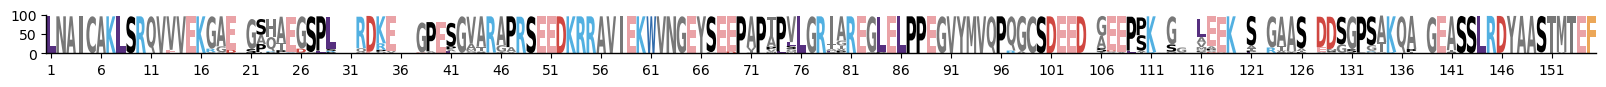

In [233]:
# Function to make web logos

DrawLogo(
        alignment_file = "../data/zoonomia_toga_mca/AD_alignments/CASZ1.fasta",
        AA_color_scheme = amino_acid_colors_white,
        start_position = 1,  # Be careful with start/end positions;
        end_position = alignment_len,    # might end up with an error if values aren't within range
        x_axis_tick_space = 5,
        figure_width = 20,
        figure_height = 0.5,
)
plt.show()

#plt.savefig("../data/zoonomia_toga_mca/prot_alignments/seq_logo_CASZ1.pdf")

2488